<a href="https://colab.research.google.com/github/Aldistwn29/DeepLearning/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
import pandas as pd
import numpy as np
import tensorflow as tf

In [6]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
# Load Dataset
# variabel independen
X = data.iloc[:,3:-1].values
# variabel depeden
Y = data.iloc[:, -1].values

In [18]:
# Encoding kolom gender
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [27]:
# Encoding kolom geografis
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [41]:
# memisahkan kumpulan data menjadi pelatihan dan pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [42]:
# melakukan penskalaan fitur
# menggunakan standarisasi
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [45]:
# menginisialisasi ann
ann = tf.keras.models.Sequential()

In [48]:
# Menambahkan lapisan Tersembunyi pertaman
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

# Menambahkan lapisan Tersembunyi kedua
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

In [50]:
# Membuat lapisan keluaran
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [51]:
# kompilasi ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [52]:
# memasang ANN
ann.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.5051 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4557 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4293 - accuracy: 0.8009
Epoch 5/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4229 - accuracy: 0.8144
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4175 - accuracy: 0.8163
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8196
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4063 - accuracy: 0.8225
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3991 - accuracy: 0.8269
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3870 - accura

In [54]:
# Hasil Prediksi untuk Observasi Tunggal
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 1s 650ms/step
[[False]]


In [57]:
# menyimpan jaringan syarf tiruan yg dibuat
ann.save("ANN.h5")

In [59]:
# Verifikasi dengan mencetak ringkasan model
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


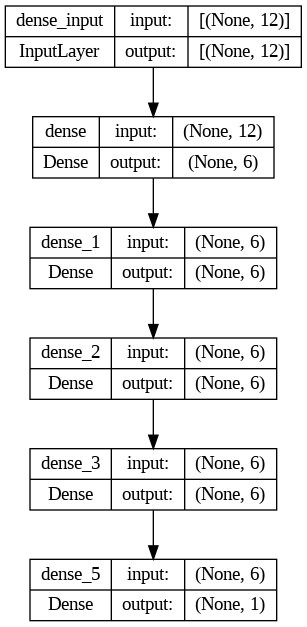

In [61]:
from tensorflow.keras.utils import plot_model

# Memuat model
from tensorflow.keras.models import load_model
ann = load_model('ANN.h5')

# Membuat plot dari model
plot_model(ann, to_file='model_plot.png', show_shapes=True, show_layer_names=True)